In [500]:
from brian2 import *
from DynapSE import DynapSE
import matplotlib.pyplot as plt
from data_loader import load_pickle
from ADM import ADM
import seaborn as sns
sns.set()

In [509]:
# initialize synapse parameters
n_neurons = 20

I_tau_syn_exc_values = np.linspace(0.58, 0.71, n_neurons)

In [510]:
spike_counts = []
syn_currents = []
num_frequencies = 20
frequencies = np.linspace(0.5, 4, num_frequencies)
for signal_freq in frequencies:

    device.reinit()
    device.activate()
    defaultclock.dt = 500 * us
    duration = 5 * second

    network = Network()
    chip = DynapSE(network)

    # generate spikes
    fs = 32 # Hz
    signal = np.sin(np.arange(0, duration / second, 1 / fs) * signal_freq * 2 * np.pi)
    up_spikes, down_spikes = ADM(
        signal,
        up_threshold=0.001,
        down_threshold=0.001,
        sampling_rate=fs,
        refractory_period=0.0001
    )

    spike_generator_up = SpikeGeneratorGroup(1, np.zeros(len(up_spikes)), up_spikes * second)

    # instantiate neurons, synapses
    DPI_neurons  = chip.get_neurons(n_neurons, 'Core_1')
    DPI_synapses_up = chip.add_connection(spike_generator_up, DPI_neurons, synapse_type='AMPA')
    DPI_synapses_up.connect(True)
    DPI_neurons.refP = 200 * ms
    DPI_synapses_up.weight = 60

    # set parameters of neurons, synapses
    DPI_neurons.I_tau_syn_exc2 = I_tau_syn_exc_values * pA
    DPI_neurons.I_wo_syn_exc2 = I_tau_syn_exc_values * pA

    # create monitors
    mon_synapse_up_state = StateMonitor(DPI_synapses_up, 'I_syn_exc2', record=True)
    mon_neuron_state  = StateMonitor(DPI_neurons,  'Imem', record=True)
    mon_neuron_input  = SpikeMonitor(spike_generator_up, name='mon_neuron_input')
    mon_neuron_output = SpikeMonitor(DPI_neurons, name='mon_neuron_output')

    # add elements to network
    network.add([spike_generator_up, DPI_neurons, DPI_synapses_up,
                 mon_synapse_up_state, mon_neuron_state, mon_neuron_input, mon_neuron_output])

    # simulation
    network.run(duration)
    
    # save spike counts
    spike_counts.append(mon_neuron_output.count)
    
    # save synaptic current means
    syn_currents.append(mon_synapse_up_state.I_syn_exc2.max(axis=1))


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


20 neurons are allocated from Core_1.


WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: "I_syn_exc2_post += ((I_wo_syn_exc2_post * weight) * I_g_syn_exc2_post) / (I_tau_syn_exc2_post * (1.0 + (I_g_syn_exc2_post / I_syn_exc2_post))) (in-place)"
 [brian2.codegen.generators.base]


In [515]:
def plot_neuron_responses(values, frequencies, name_of_values):
    values = np.array(values)
    plt.figure(figsize=(16,10),dpi=150)
    norm = mpl.colors.Normalize(vmin=0, vmax=values.shape[1])
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.get_cmap('viridis_r'))
    for i in range(values.shape[1]):
        plt.plot(frequencies, values[:, i], label=round(I_tau_syn_exc_values[i], 2), color=cmap.to_rgba(i))
        plt.fill_between(frequencies, values[:, i], color=cmap.to_rgba(i), alpha=1)
    plt.legend(title='I_tau_syn_exc values')
    plt.xticks(fontsize=12)
    plt.xlabel('Sine input frequency [Hz]', fontsize=14)
    plt.yticks(fontsize=12)
    plt.ylabel('Output value', fontsize=14)
    plt.title(name_of_values + ' of DPI neurons with different excitatory synaptic time constants', fontsize=15)

(5e-09, 6e-09)

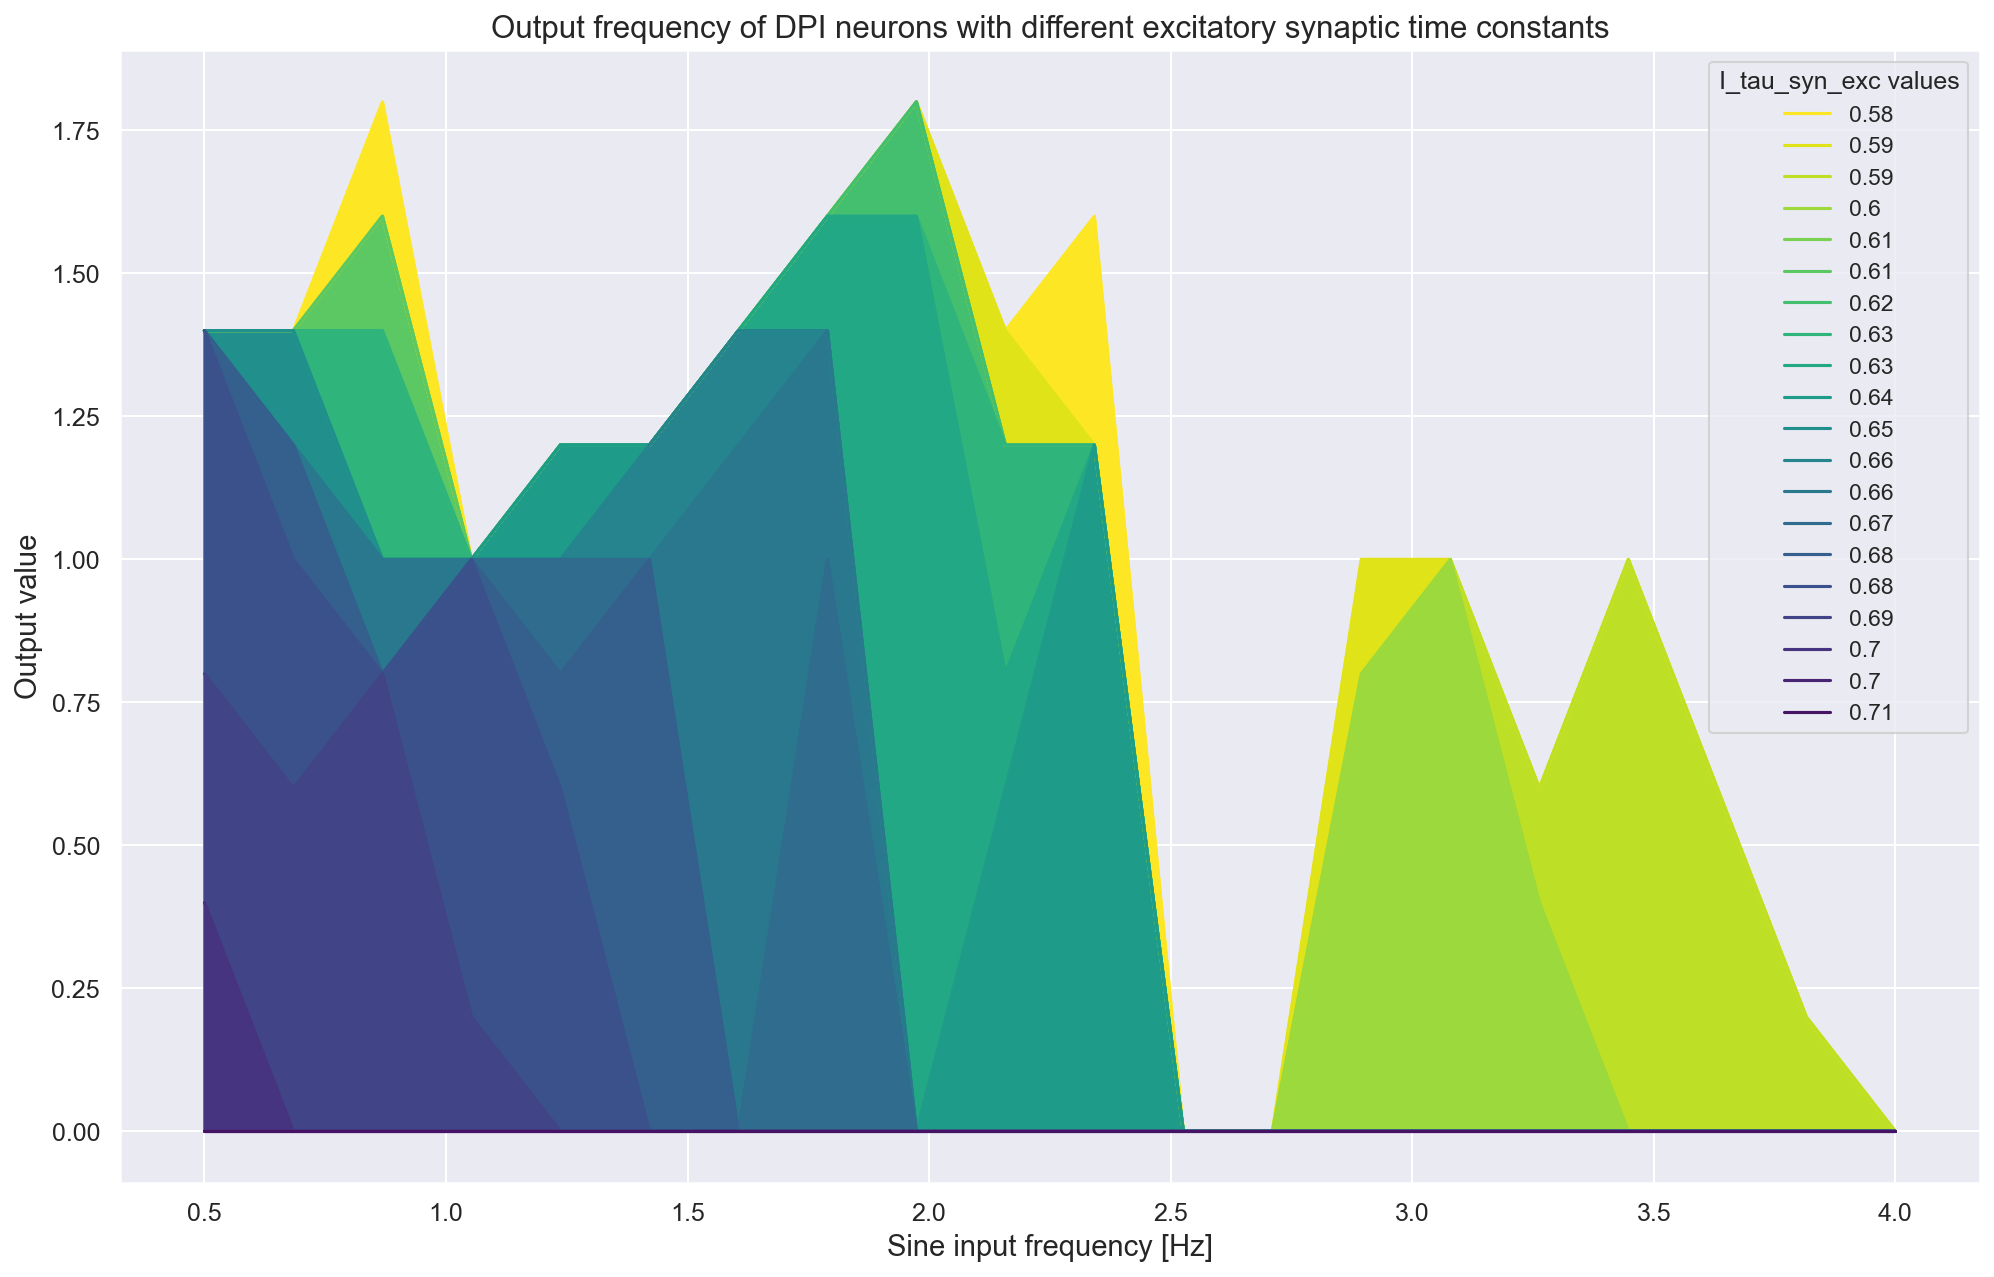

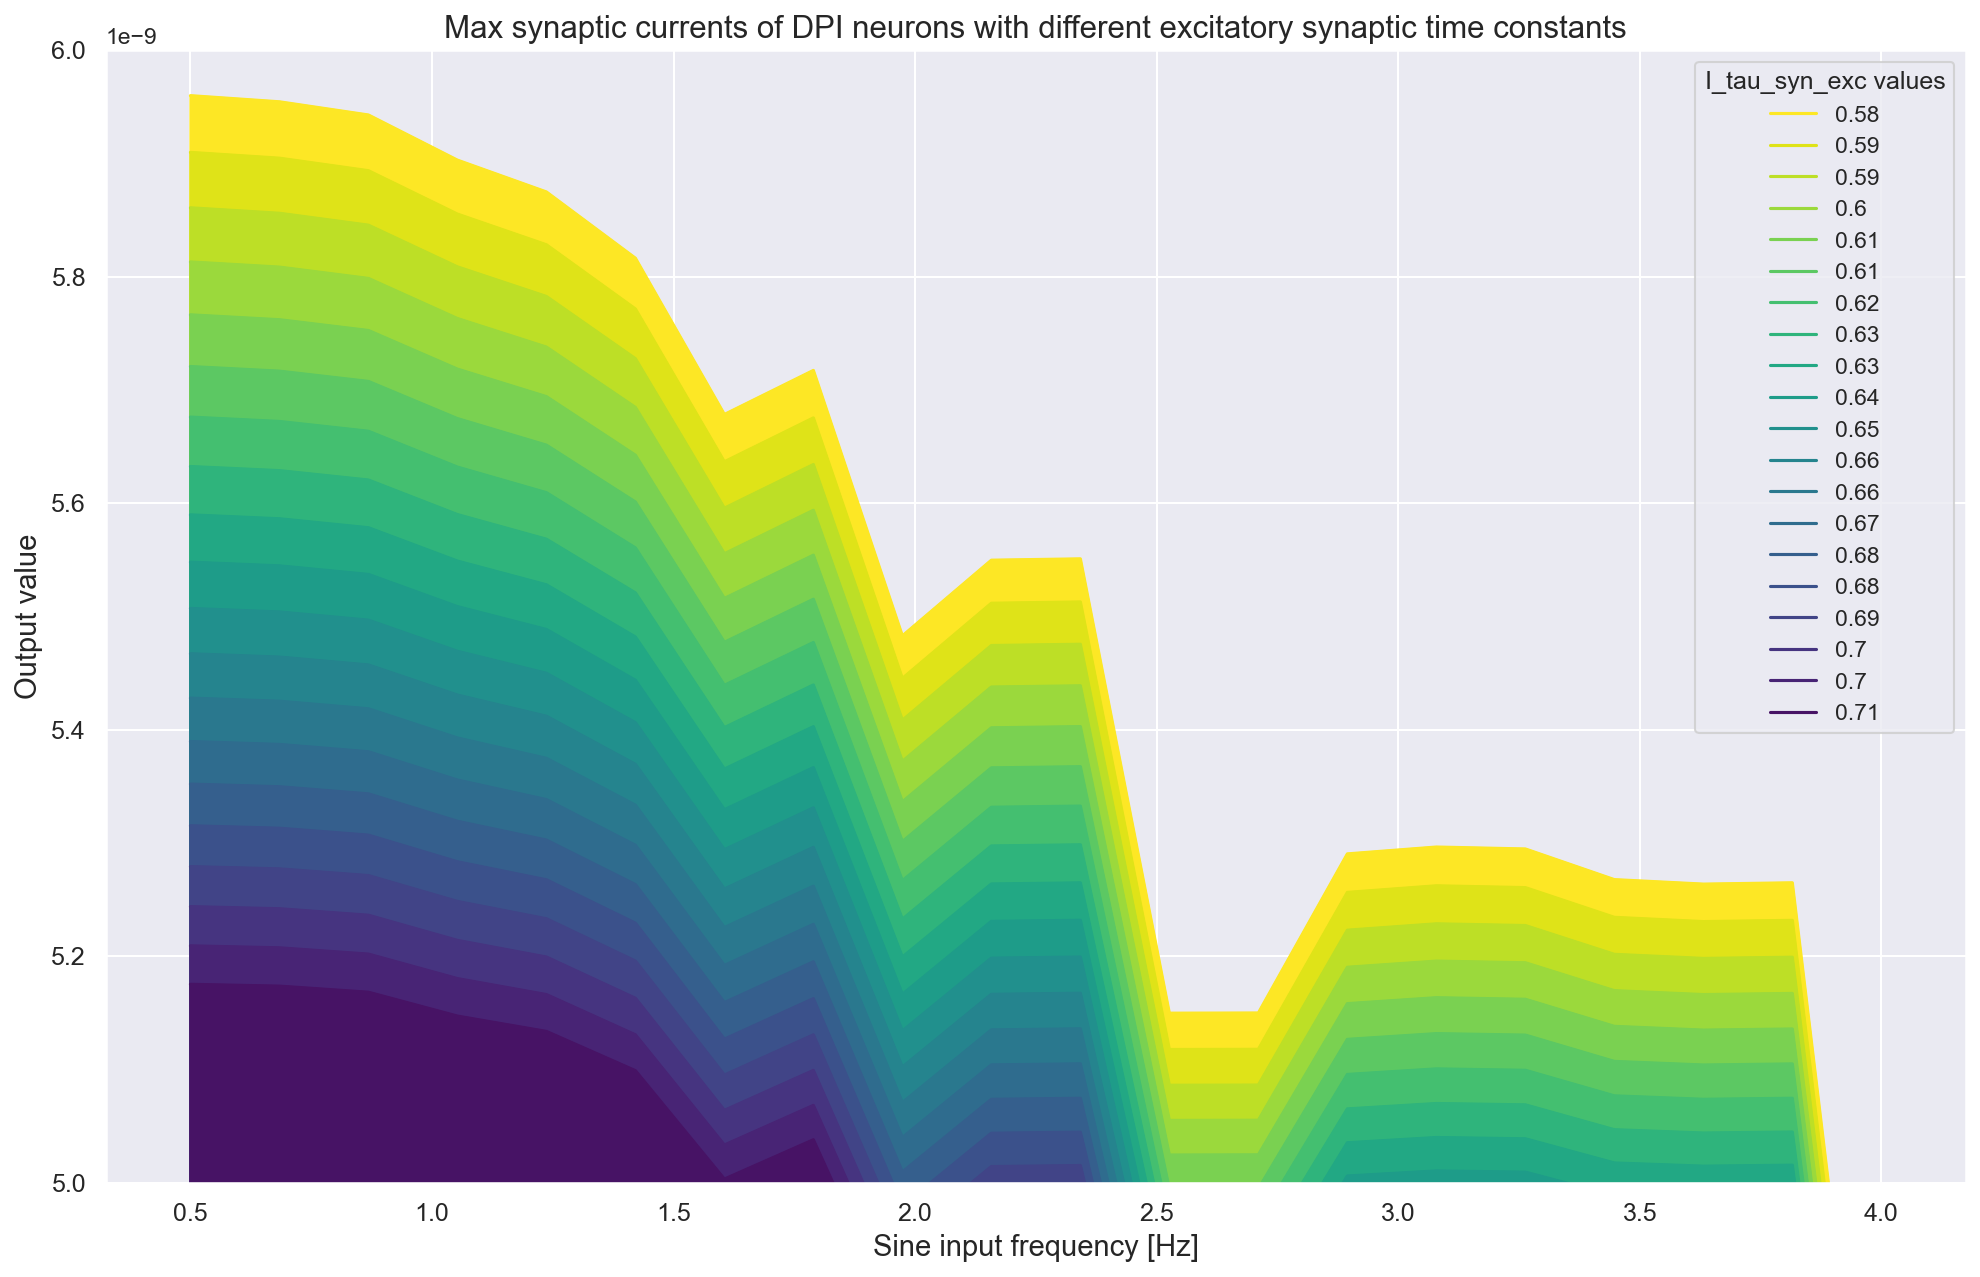

In [516]:
plot_neuron_responses(spike_counts / duration / second, frequencies, 'Output frequency')
plot_neuron_responses(syn_currents, frequencies, 'Max synaptic currents')
plt.ylim(5e-9, 6e-9)

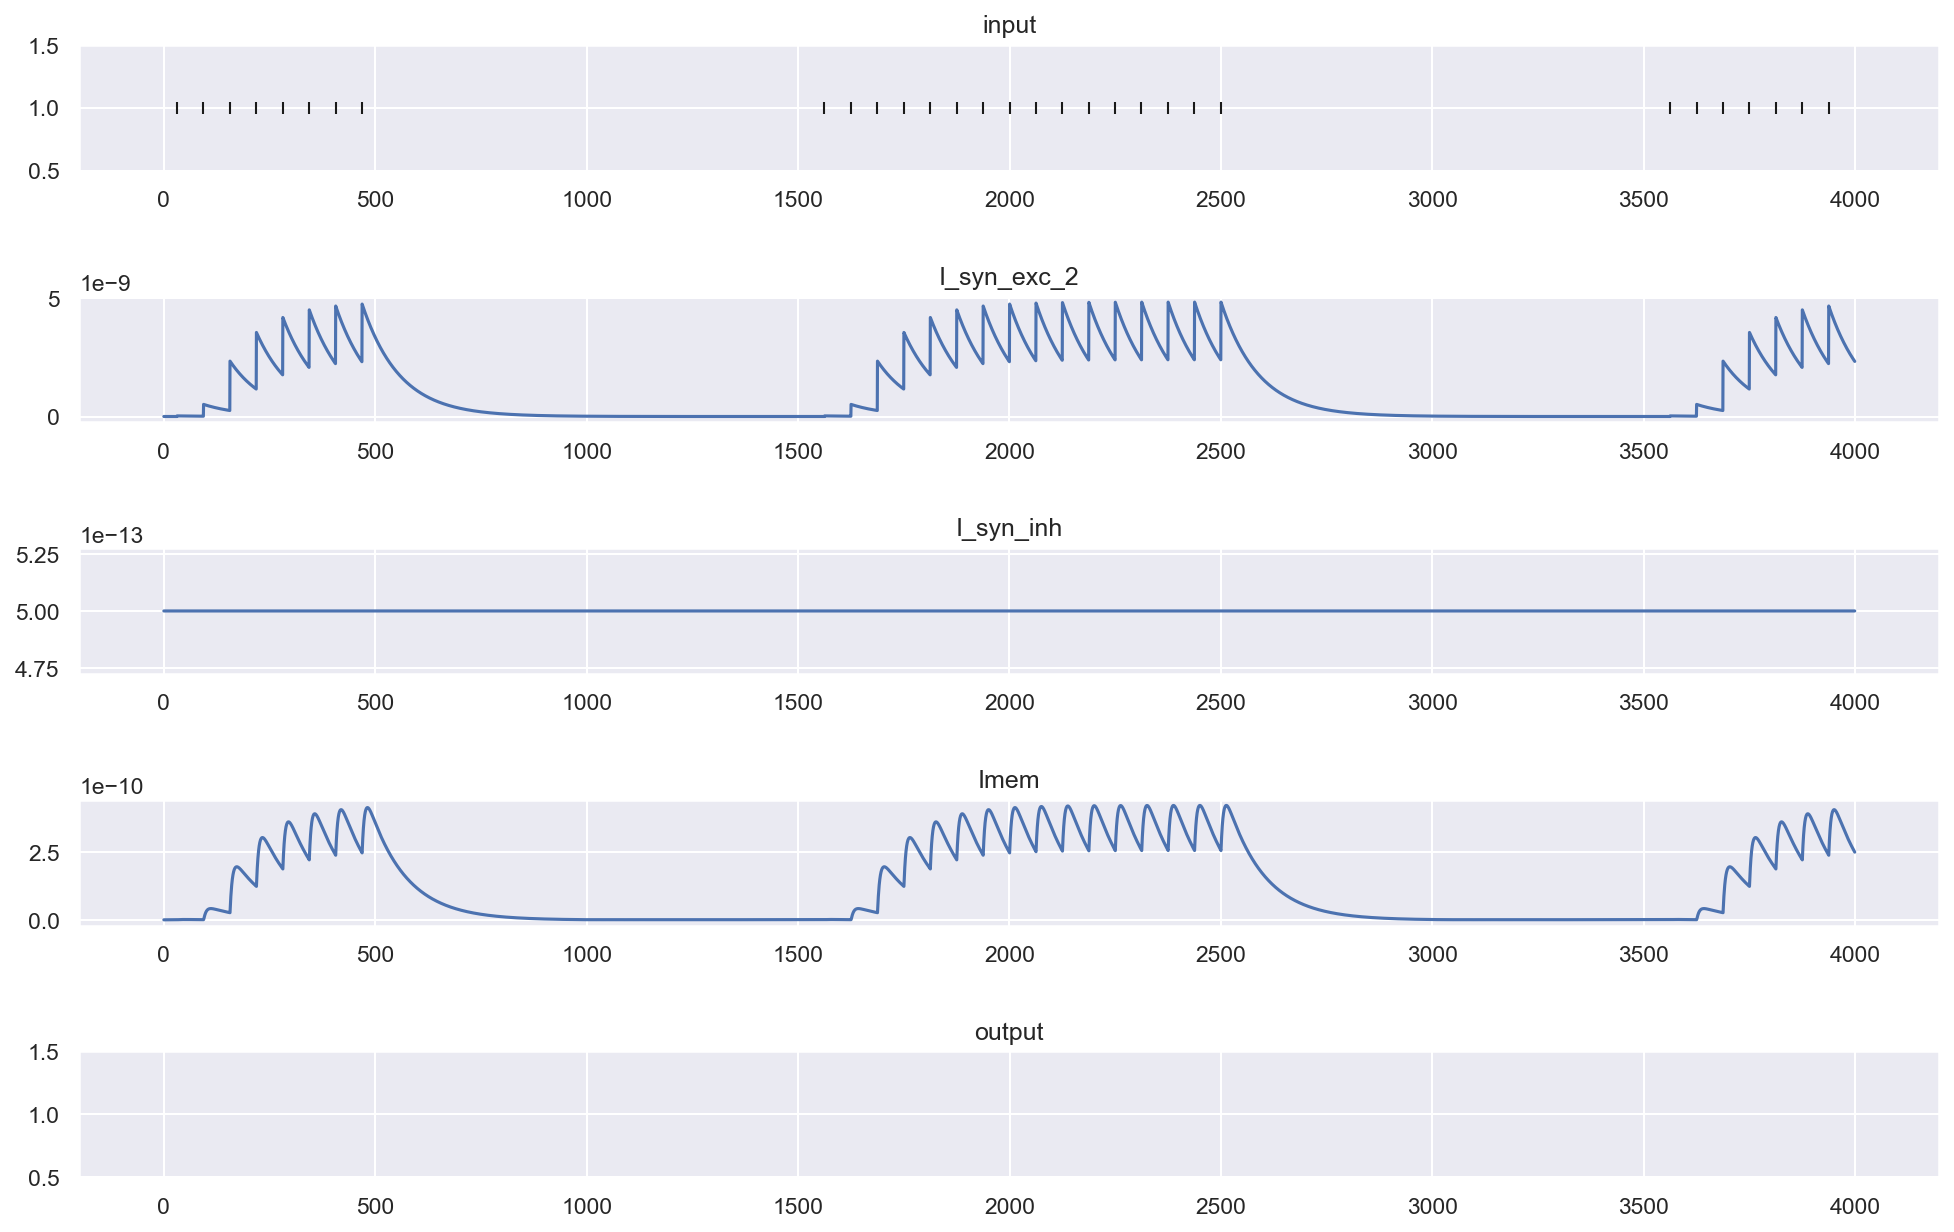

In [410]:
plt.figure(figsize=(16,10),dpi=150)
plt.subplots_adjust(hspace=1)

output_idx = 9

plt.subplot(511)
times = int(duration/ms)
spike_placeholder = np.zeros(times)
spike_placeholder[np.array(mon_neuron_input.t/ms, dtype=int)]=1
plt.plot(spike_placeholder,'k|')
plt.ylim(0.5, 1.5)
plt.title('input')
#plt.xlim(0, 100)

plt.subplot(512)
plt.plot(mon_synapse_up_state.t / ms, mon_synapse_up_state.I_syn_exc2[output_idx])
plt.title('I_syn_exc_2')

plt.subplot(513)
plt.plot(mon_synapse_down_state.t / ms, mon_synapse_down_state.I_syn_inh[output_idx])
plt.title('I_syn_inh')

plt.subplot(514)
plt.plot(mon_neuron_state.t / ms, mon_neuron_state.Imem[output_idx])
plt.title('Imem')


plt.subplot(515)
times = int(duration/ms)
spike_placeholder = np.zeros(times)
relevant_timestamps = mon_neuron_output.t[mon_neuron_output.i == output_idx]
spike_placeholder[np.array(relevant_timestamps/ms, dtype=int)]=1
plt.plot(spike_placeholder,'k|')
plt.ylim(0.5, 1.5)
plt.title('output')



plt.show()

In [457]:
mon_synapse_up_state.I_syn_exc2.mean(axis=1)

array([1.82451407, 1.78634106, 1.74933953, 1.71344456, 1.67859569,
       1.64473652, 1.61181442, 1.57978025, 1.5485881 , 1.51819505]) * namp